In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/opt/caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe
import os

In [2]:
# Lets load up the network!
# Assuming you have trained Cifar10 uisng http://caffe.berkeleyvision.org/gathered/examples/cifar10.html
# or trained using https://github.com/TrackDR/ModdedIpythonNotebooks/blob/master/CaffeCifar10TrainCPP.ipynb

model_file = '/opt/caffe/examples/cifar10/cifar10_full.prototxt'
weights_file = '/opt/caffe/examples/cifar10/cifar10_full_iter_70000.caffemodel'
net = caffe.Net(model_file, weights_file, caffe.TEST)

In [3]:
blob = caffe.proto.caffe_pb2.BlobProto()
data = open( '/opt/caffe/examples/cifar10/mean.binaryproto' , 'rb' ).read()
blob.ParseFromString(data)
arr = np.array( caffe.io.blobproto_to_array(blob) )
out = arr[0]
np.save( '/home/ubuntu/cifar10-mean.npy' , out )

cifar10labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load('/home/ubuntu/cifar10-mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

# set net to batch size of 10
net.blobs['data'].reshape(10,3,32,32)

In [5]:
import os
import sys
import urllib
import urllib2
import json
import random
import imghdr

In [6]:
q = 'frog'

In [7]:
f = urllib2.urlopen('http://ajax.googleapis.com/ajax/services/search/images?q=' + q + '&v=1.0&rsz=large&start=1')
data = json.load(f)
f.close()

results = data['responseData']['results']
url = results[random.randint(0, len(results) - 1)]['url']
urllib.urlretrieve(url, './image')

imagetype = imghdr.what('./image')
if not(type(imagetype) is None):
  os.rename('./image', './image.' + imagetype)

In [8]:
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image('image.jpeg'))
out = net.forward()

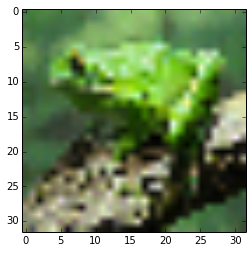

In [9]:
plt.imshow(transformer.deprocess('data', net.blobs['data'].data[0]))

In [10]:
print("Predicted class is #{}.".format(out['prob'].argmax()))
cifar10labels[out['prob'].argmax()]

Predicted class is #6.


'frog'

In [11]:
probs = net.blobs['prob'].data[0]
out['prob']

array([[  4.02089732e-04,   5.07764844e-03,   5.20855887e-04,
          1.14288989e-04,   7.96848253e-05,   3.91041840e-06,
          9.27067041e-01,   1.51949671e-05,   1.45683449e-03,
          6.52625263e-02],
       [  4.02089732e-04,   5.07764844e-03,   5.20855887e-04,
          1.14288989e-04,   7.96848253e-05,   3.91041840e-06,
          9.27067041e-01,   1.51949671e-05,   1.45683449e-03,
          6.52625263e-02],
       [  4.02089732e-04,   5.07764844e-03,   5.20855887e-04,
          1.14288989e-04,   7.96848253e-05,   3.91041840e-06,
          9.27067041e-01,   1.51949671e-05,   1.45683449e-03,
          6.52625263e-02],
       [  4.02089732e-04,   5.07764844e-03,   5.20855887e-04,
          1.14288989e-04,   7.96848253e-05,   3.91041840e-06,
          9.27067041e-01,   1.51949671e-05,   1.45683449e-03,
          6.52625263e-02],
       [  4.02089732e-04,   5.07764844e-03,   5.20855887e-04,
          1.14288989e-04,   7.96848253e-05,   3.91041840e-06,
          9.27067041e-01